## 1. Introduction

To brush up your python knowledge this link is recommended http://cs231n.github.io/python-numpy-tutorial/#python-basic

Direct IPython note book Link for same material https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb

### The customary Hello World !

In [442]:
print("Hello World!")

Hello World!


### Comments

In [443]:
'''
Block Comments 1
Block Comments 2
'''

# line comments

print()

### The Format method

In [444]:
#dynamically typed two data types
age = 20
name = 'Sheldon'


print('{} was {} years old when he wrote this book'.format(name, age))
print('Why is {} playing with that python?'.format(name))

Sheldon was 20 years old when he wrote this book
Why is Sheldon playing with that python?


In [445]:
print('{0:.3f}'.format(1.0/3))

0.333


In [446]:
print('{0:_^11}'.format('hello'))

___hello___


### Conditions and Loops

In [447]:
name = "Sheldon"
age = 23
if name == "Sheldon" and age == 23:
    print("Your name is Sheldon, and you are also 23 years old.")

if name == "Sheldon" or name == "Raj":
    print("Your name is either Sheldon or Raj.")

Your name is Sheldon, and you are also 23 years old.
Your name is either Sheldon or Raj.


### while and for loop

## 2. Numpy

http://cs231n.github.io/python-numpy-tutorial/#python-basic  
Direct IPython note book Link https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb

## 3. Pandas

[https://www.learnpython.org/en/Pandas_Basics](https://www.learnpython.org/en/Pandas_Basics)

## 4. Image

As we saw in the lecture, the images can be loaded in a form of Tensor
There are many ways how we can load images and convert them into tensors.
 We will be using pytorch's Tensors to manipulate images as tensors, and the pillow (PIL) image processing library. [Read more abouit PIL](https://pillow.readthedocs.io/en/5.3.x/)

It is recommended to go through the Pytorch library, as the coming exercises will be based on Pytorch. You can go through the simple tutorial here, [Pytorch 60 min blitz Tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html). The library is fairly simple and python based. However knowledge of Pytorch is not required for this tutorial

Install below python packages via conda or pip.
* pytorch  
* numpy  
* pillow-simd  
* matplotlib  
* torchvision  


In [448]:
import torch 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline

Loading an Image in PIL :

In [449]:
input_image = Image.open('Lenna.png')

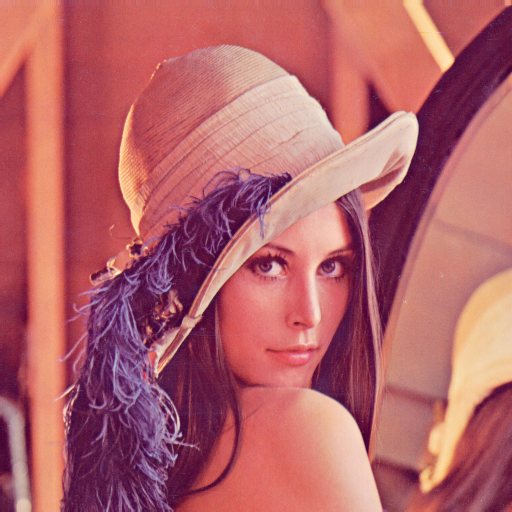

In [450]:
input_image

Using torchvision module in Pytorch library to convert PIL image into a Tensor.[Read more...](https://pytorch.org/docs/stable/torchvision/transforms.html)

One can think of a tensor in Pytorch as a numpy array, almost all operations on numpy array are available for the tensors in Pytorch. The major difference is that tensors can be used for faster computations on GPU.

In [451]:
pil_to_tensor = transforms.ToTensor() # returns a functioon to convert PIL i mage into tensor

In [452]:
input_tensor = pil_to_tensor(input_image)

In [453]:
input_tensor.shape
# The shape of the tensor returned is Channels x Height X Width
# Notice the shape of the 3 channel image 

torch.Size([3, 512, 512])

In [454]:
# Plot the image here using matplotlib.
def plot_image(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

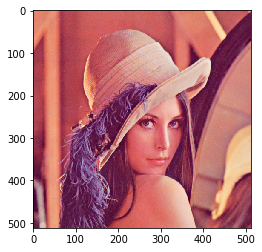

In [455]:
plot_image(input_tensor)

### 4.1 Image Channels

Generally an input image can be a 3 channel image or 1 channel image. The example shown above is a 3 channel RGB image.
We can plot different channels seprately

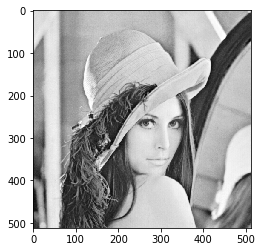

In [456]:
# Plot the image here using matplotlib.
def plot_image_channel(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy(), cmap='gray')
    plt.show()
    
plot_image_channel(input_tensor[0]) # index 0 means plotting the R channel,
#try plotting with index of different channels and analyze the differnece

### 4.2 Convert to Gray scale

Using torchvision module in Pytorch library to convert PIL image into grayscale.[Read more...](https://pytorch.org/docs/stable/torchvision/transforms.html)

In [457]:
pil_to_grayscale = transforms.Grayscale() # returns a function to convert image in grayscale

In [458]:
gray_image = pil_to_grayscale(input_image)

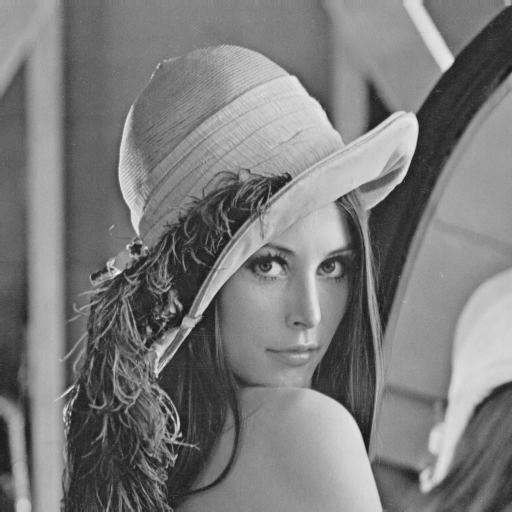

In [459]:
gray_image

In [460]:
# converting the PIL grayscale image to Tensor
gray_tensor = pil_to_tensor(gray_image)

In [461]:
gray_tensor.shape

torch.Size([1, 512, 512])

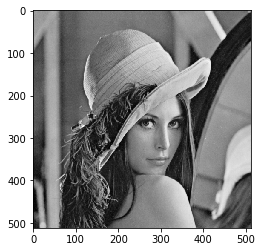

In [462]:
plot_image_channel(gray_tensor[0])

### 4.3 Augmemntation

In the second exercise we will see that how we can apply different augmentations techniques to an image data. This is helpuful as it increases the variance in the input data, which indeed is helpful in preventing overfitting of a deep learning model

In [463]:
augment = transforms.Compose([ transforms.CenterCrop(400), # this crops the image to a size of 400,400
                              transforms.RandomAffine(degrees=10), # applies a random affine transform, between -10 to 10 degrees
                             transforms.ToTensor(), # converts the PIL image into a tensor
                             ])

In [464]:
type(input_image)

PIL.PngImagePlugin.PngImageFile

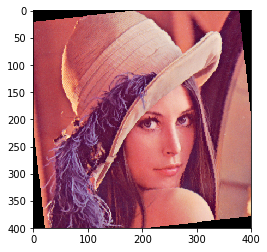

In [465]:
augment_image = augment(input_image)
plot_image(augment_image)
# run this cell multiple times to see random affine transormations being applied in the image

### 4.4 Convolution

In [466]:
#small hack to pytorch library, can be just used as a function to apply convolution operation
def SingleChannelConvolution(input_image, kernel):
    import torch.nn.functional as F
    from torch.autograd import Variable
    output = F.conv2d(Variable(input_image.unsqueeze(0).unsqueeze(0)), 
                      Variable(kernel.unsqueeze(0).unsqueeze(0)), padding = 1)
    return output.data.squeeze()

In [467]:
input_tensor = input_tensor[0]

In [468]:
# The kernel is a 3x3 matrix that computes the Sobel operator.
# See https://en.wikipedia.org/wiki/Sobel_operator
weights = torch.Tensor([[1.0, 0.0, -1.0],
                        [2.0, 0.0, -2.0],
                        [1.0, 0.0, -1.0]])

In [469]:
output1 = SingleChannelConvolution(input_tensor, weights)
output2 = SingleChannelConvolution(input_tensor, weights.t())

In [470]:
padder = torch.ones(input_tensor.size(0), 10)
output = torch.cat((output1,padder,output2),1 ) #added padder to just seperate two images 

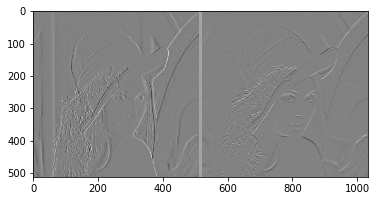

In [471]:
plot_image_channel(output)

We see that applying different Filter weights, one as Sobel filter and other as its transpose gives two different types of edge information about the images. The same is the concept of the Convolutional neural network, where we these different filter weights are learned by backpropagation algorithm, which in turns provides useful informations about the image. Thus, helping in solving complex recognition tasks, like image classification.